In [9]:
from itertools import combinations_with_replacement, chain
import numpy as np
from matplotlib import pyplot as plt

In the next cell I define all the mass shifts of amino acids and their modificiations we will look for that have potential mass isobaricity.

In [10]:
amino_acid_masses = {
    "G": 57.02146,
    "A": 71.03711,
    "S": 87.03203,
    "P": 97.05276,
    "V": 99.06841,
    "T": 101.04768,
    "C": 103.00919,
    "L": 113.08406,
    "I": 113.08406,
    "N": 114.04293,
    "D": 115.02694,
    "Q": 128.05858,
    "K": 128.09496,
    "E": 129.04259,
    "M": 131.04049,
    "H": 137.05891,
    "F": 147.06841,
    "R": 156.10111,
    "Y": 163.06333,
    "W": 186.07931,
    "C[Carbamidomethyl]": 57.0215
    + 103.00919,  # Example for "C with carbamidomethyl modification":
    "K[methyl]": 142.1267,  # Example for "K with methyl modification":
    "Q[Pyro-glu]": 128.0586,  # Example for "Q with pyro-glu modification":
    "K[Dimethyl]": 156.1406,  # Example for "K with dimethyl modification":
    "S[Phospho]": 166.9987,  # Example for "S with phospho modification":
    "T[Phospho]": 181.0147,  # Example for "T with phospho modification":
    "Y[Phospho]": 243.0297,  # Example for "Y with phospho modification":
    "K[Trimethyl]": 170.1545,  # Example for "K with trimethyl modification":
    "K[Acetyl]": 170.1055,  # Example for "K with acetyl modification":
    "N[Deamidated]": 115.0270,  # Example for "N with deamidated modification":
    "K[Propionyl]": 184.1194,  # Example for "K with propionyl modification":
    "K[Butyryl]": 198.1333,  # Example for "K with butyryl modification":
    "K[Formyl]": 168.0892,  # Example for "K with formyl modification":
    "K[Oxidation]": 144.1059,  # Example for "K with oxidation modification":
    "K[Malonyl]": 184.1055,  # Example for "K with malonyl modification":
    "K[Succinyl]": 198.1194,  # Example for "K with succinyl modification":
    "R[Methyl]": 170.0914,  # Example for "R with methyl modification":
    "R[Dimethyl]": 184.1053,  # Example for "R with dimethyl modification":
    "R[Trimethyl]": 198.1192,  # Example for "R with trimethyl modification":
    "Q[Deamidated]": 115.0270,  # Example for "Q with deamidated modification":
    "N[Oxidation]": 115.0269,  # Example for "N with oxidation modification":
    "M[Oxidation]": 147.0354,  # Example for "M with oxidation modification":
    "H[Oxidation]": 153.0192,  # Example for "H with oxidation modification":
    "M[Carbamylation]": 125.0477,  # Example for "M with carbamylation modification":
    "N[Amonia-loss]": 113.0473,  # Example for "N with ammonia-loss modification":
    "R[Amonia-loss]": 129.0426,  # Example for "R with ammonia-loss modification":
    "Q[Amonia-loss]": 114.0429,  # Example for "Q with ammonia-loss modification":
    "N[Pyro-glu]": 128.0586,  # Example for "N with pyro-glu modification":
    "K[Pyro-glu]": 128.0949,  # Example for "K with pyro-glu modification":
    "R[Pyro-glu]": 156.1011,  # Example for "R with pyro-glu modification":
}

In the next cell I calculate all combinations of isobars for a given peptide length.

In [11]:
# Function to calculate the total mass of a combination
def calculate_mass(combination):
    return sum(amino_acid_masses[aa] for aa in combination)

overlap_list = []
max_length_isobar = 3
# Group masses within a tolerance of 0.025
tolerance = 0.02 # TOF
#tolerance = 0.005  # Orbitrap


for i in range(20,len(amino_acid_masses.keys())):
    # Generate all combinations for lengths 1, 2, and 3
    all_combinations = []
    for r in range(1, max_length_isobar+1):  # Lengths 1 to 3
        combinations_r = combinations_with_replacement(list(amino_acid_masses.keys())[0:i], r)
        all_combinations.extend(combinations_r)

    # Calculate masses and store combination details
    mass_details = {}
    for comb in all_combinations:
        mass = round(calculate_mass(comb), 5)  # Round to handle floating-point arithmetic
        peptide_name = "".join(comb)
        if mass not in mass_details:
            mass_details[mass] = []
        mass_details[mass].append(peptide_name)

    sorted_masses = sorted(mass_details.keys())
    grouped_masses = []
    current_group = [(sorted_masses[0], mass_details[sorted_masses[0]])]

    for mass in sorted_masses[1:]:
        if mass - current_group[-1][0] <= tolerance:
            current_group.append((mass, mass_details[mass]))
        else:
            if len(current_group) > 1:
                grouped_masses.append(current_group)
            current_group = [(mass, mass_details[mass])]

    # Add the last group if it wasn't added
    if len(current_group) > 1:
        grouped_masses.append(current_group)

    # Output the result
    print(i,f"Number of overlapping mass groups: {len(grouped_masses)}")
    possibilities_list = []
    for gm_count in grouped_masses:
        tot_possibilities = 0
        for sub_gm in gm_count:
            tot_possibilities += len(sub_gm[1])
        possibilities_list.append(tot_possibilities)

    overlap_list.append(
        [i, len(grouped_masses) - i, np.mean(possibilities_list)]
    )

    if i == 20:
        for gm in grouped_masses:
            print("Example of overlapping masses in one group:", gm)

modification_count_tof = [ol[0] for ol in overlap_list]
group_count_tof = [ol[1] for ol in overlap_list]
group_size_count_tof = [ol[2] for ol in overlap_list]

20 Number of overlapping mass groups: 261
Example of overlapping masses in one group: [(114.04292, ['GG']), (114.04293, ['N'])]
Example of overlapping masses in one group: [(128.05857, ['GA']), (128.05858, ['Q'])]
Example of overlapping masses in one group: [(156.08987, ['GV']), (156.10111, ['R'])]
Example of overlapping masses in one group: [(171.06438, ['GGG']), (171.06439, ['GN'])]
Example of overlapping masses in one group: [(174.0463, ['AC']), (174.06406, ['SS'])]
Example of overlapping masses in one group: [(185.08003, ['GGA']), (185.08004, ['GQ', 'AN'])]
Example of overlapping masses in one group: [(186.06405, ['GE', 'AD']), (186.07931, ['W'])]
Example of overlapping masses in one group: [(188.06195, ['GM']), (188.07971, ['ST'])]
Example of overlapping masses in one group: [(199.09568, ['GAA']), (199.09569, ['AQ'])]
Example of overlapping masses in one group: [(200.06195, ['PC']), (200.0797, ['AE'])]
Example of overlapping masses in one group: [(201.07495, ['GGS']), (201.07496, 

Perform exactly the same analysis as above, now for the orbitrap mass analyzer.

In [12]:
# Function to calculate the total mass of a combination
def calculate_mass(combination):
    return sum(amino_acid_masses[aa] for aa in combination)


overlap_list = []
# Group masses within a tolerance of 0.025
# tolerance = 0.02 # TOF
tolerance = 0.005  # Orbitrap

for i in range(20, len(amino_acid_masses.keys())):
    # Generate all combinations for lengths 1, 2, and 3
    all_combinations = []
    for r in range(1, 4):  # Lengths 1 to 3
        combinations_r = combinations_with_replacement(
            list(amino_acid_masses.keys())[0:i], r
        )
        all_combinations.extend(combinations_r)

    # Calculate masses and store combination details
    mass_details = {}
    for comb in all_combinations:
        mass = round(
            calculate_mass(comb), 5
        )  # Round to handle floating-point arithmetic
        peptide_name = "".join(comb)
        if mass not in mass_details:
            mass_details[mass] = []
        mass_details[mass].append(peptide_name)

    sorted_masses = sorted(mass_details.keys())
    grouped_masses = []
    current_group = [(sorted_masses[0], mass_details[sorted_masses[0]])]

    for mass in sorted_masses[1:]:
        if mass - current_group[-1][0] <= tolerance:
            current_group.append((mass, mass_details[mass]))
        else:
            if len(current_group) > 1:
                grouped_masses.append(current_group)
            current_group = [(mass, mass_details[mass])]

    # Add the last group if it wasn't added
    if len(current_group) > 1:
        grouped_masses.append(current_group)

    # Output the result
    print(i, f"Number of overlapping mass groups: {len(grouped_masses)}")
    possibilities_list = []
    for gm_count in grouped_masses:
        tot_possibilities = 0
        for sub_gm in gm_count:
            tot_possibilities += len(sub_gm[1])
        possibilities_list.append(tot_possibilities)

    overlap_list.append([i, len(grouped_masses) - i, np.mean(possibilities_list)])

modification_count_orbi = [ol[0] for ol in overlap_list]
group_count_orbi = [ol[1] for ol in overlap_list]
group_size_count_orbi = [ol[2] for ol in overlap_list]

20 Number of overlapping mass groups: 152
21 Number of overlapping mass groups: 228
22 Number of overlapping mass groups: 280
23 Number of overlapping mass groups: 403
24 Number of overlapping mass groups: 480
25 Number of overlapping mass groups: 538
26 Number of overlapping mass groups: 638
27 Number of overlapping mass groups: 726
28 Number of overlapping mass groups: 818
29 Number of overlapping mass groups: 888
30 Number of overlapping mass groups: 1050
31 Number of overlapping mass groups: 1146
32 Number of overlapping mass groups: 1238
33 Number of overlapping mass groups: 1362
34 Number of overlapping mass groups: 1492
35 Number of overlapping mass groups: 1612
36 Number of overlapping mass groups: 1688
37 Number of overlapping mass groups: 1804
38 Number of overlapping mass groups: 1879
39 Number of overlapping mass groups: 1983
40 Number of overlapping mass groups: 1983
41 Number of overlapping mass groups: 1983
42 Number of overlapping mass groups: 2104
43 Number of overlapp

# Plotting

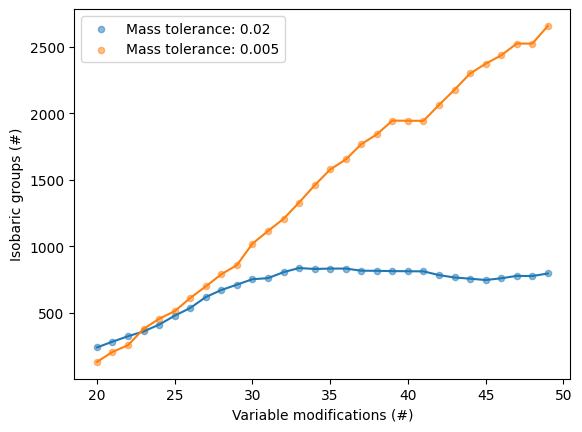

In [13]:
plt.scatter(
    modification_count_tof,
    group_count_tof,
    s=20,
    alpha=0.5,
    label="Mass tolerance: 0.02",
)
plt.scatter(
    modification_count_orbi,
    group_count_orbi,
    s=20,
    alpha=0.5,
    label="Mass tolerance: 0.005",
)
plt.xlabel("Variable modifications (#)")
plt.ylabel("Isobaric groups (#)")
plt.plot(modification_count_tof, group_count_tof)
plt.plot(modification_count_orbi, group_count_orbi)
plt.legend()

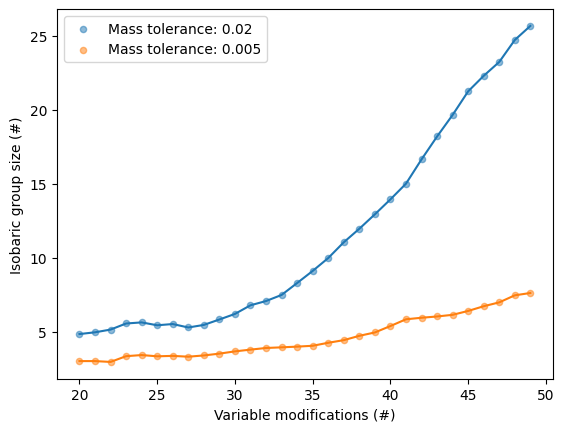

In [14]:
plt.scatter(
    modification_count_tof,
    group_size_count_tof,
    s=20,
    alpha=0.5,
    label="Mass tolerance: 0.02",
)
plt.scatter(
    modification_count_orbi, group_size_count_orbi, s=20, alpha=0.5, label="Mass tolerance: 0.005"
)
plt.xlabel("Variable modifications (#)")
plt.ylabel("Isobaric group size (#)")
plt.plot(modification_count_tof, group_size_count_tof)
plt.plot(modification_count_orbi, group_size_count_orbi)
plt.legend()